
# Sequence Graph Transform (SGT) &mdash; Sequence Embedding for Clustering, Classification, and Search


The following will cover,

1. SGT Class Definition
2. Installation
3. Test Examples
4. Sequence Clustering Example
5. Sequence Classification Example
6. Sequence Search Example
7. SGT - Spark implementation for distributed computing
8. Datasets


## Definition

Sequence Graph Transform (SGT) is a sequence embedding function. SGT extracts the short- and long-term sequence features and embeds them in a finite-dimensional feature space. The long and short term patterns embedded in SGT can be tuned without any increase in the computation."


```class SGT():
    '''
    Compute embedding of a single or a collection of discrete item 
    sequences. A discrete item sequence is a sequence made from a set
    discrete elements, also known as alphabet set. For example,
    suppose the alphabet set is the set of roman letters, 
    {A, B, ..., Z}. This set is made of discrete elements. Examples of
    sequences from such a set are AABADDSA, UADSFJPFFFOIHOUGD, etc.
    Such sequence datasets are commonly found in online industry,
    for example, item purchase history, where the alphabet set is
    the set of all product items. Sequence datasets are abundant in
    bioinformatics as protein sequences.
    Using the embeddings created here, classification and clustering
    models can be built for sequence datasets.
    Read more in https://arxiv.org/pdf/1608.03533.pdf
    '''
```
    Parameters
    ----------
    Input:

    alphabets       Optional, except if mode is Spark. 
                    The set of alphabets that make up all 
                    the sequences in the dataset. If not passed, the
                    alphabet set is automatically computed as the 
                    unique set of elements that make all the sequences.
                    A list or 1d-array of the set of elements that make up the      
                    sequences. For example, np.array(["A", "B", "C"].
                    If mode is 'spark', the alphabets are necessary.

    kappa           Tuning parameter, kappa > 0, to change the extraction of 
                    long-term dependency. Higher the value the lesser
                    the long-term dependency captured in the embedding.
                    Typical values for kappa are 1, 5, 10.

    lengthsensitive Default false. This is set to true if the embedding of
                    should have the information of the length of the sequence.
                    If set to false then the embedding of two sequences with
                    similar pattern but different lengths will be the same.
                    lengthsensitive = false is similar to length-normalization.
                    
    flatten         Default True. If True the SGT embedding is flattened and returned as
                    a vector. Otherwise, it is returned as a matrix with the row and col
                    names same as the alphabets. The matrix form is used for            
                    interpretation purposes. Especially, to understand how the alphabets
                    are "related". Otherwise, for applying machine learning or deep
                    learning algorithms, the embedding vectors are required.
    
    mode            Choices in {'default', 'multiprocessing'}. Note: 'multiprocessing' 
                    mode requires pandas==1.0.3+ and pandarallel libraries.
    
    processors      Used if mode is 'multiprocessing'. By default, the 
                    number of processors used in multiprocessing is
                    number of available - 1.
    '''

    
    Attributes
    ----------
    def fit(sequence)
    
    Extract Sequence Graph Transform features using Algorithm-2 in https://arxiv.org/abs/1608.03533.
    Input:
    sequence        An array of discrete elements. For example,
                    np.array(["B","B","A","C","A","C","A","A","B","A"].
                    
    Output: 
    sgt embedding   sgt matrix or vector (depending on Flatten==False or True) of the sequence
    
    
    --
    def fit_transform(corpus)
    
    Extract SGT embeddings for all sequences in a corpus. It finds
    the alphabets encompassing all the sequences in the corpus, if not inputted. 
    However, if the mode is 'spark', then the alphabets list has to be
    explicitly given in Sgt object declaration.
    
    Input:
    corpus          A list of sequences. Each sequence is a list of alphabets.
    
    Output:
    sgt embedding of all sequences in the corpus.
    
    
    --
    def transform(corpus)
    
    Find SGT embeddings of a new data sample belonging to the same population
    of the corpus that was fitted initially.

## Install SGT

Install SGT in Python by running,

```pip install sgt```

In [6]:
import sgt
sgt.__version__

'2.0.0'

In [7]:
from sgt import SGT

In [8]:
# -*- coding: utf-8 -*-
# Authors: Chitta Ranjan <cran2367@gmail.com>
#
# License: BSD 3 clause

## Illustrative examples

In [9]:
import numpy as np
import pandas as pd
from itertools import chain
from itertools import product as iterproduct
import warnings

import pickle

########
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import sklearn.metrics
import time

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(7) # fix random seed for reproducibility

# from sgt import Sgt

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

root_path = 'gdrive/My Drive/Work/Research/Sequence Clustering/sgt'
import os
os.chdir(root_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Installation Test Examples

In the following, there are a few test examples to verify the installation.

In [10]:
# Learning a sgt embedding as a matrix with 
# rows and columns as the sequence alphabets. 
# This embedding shows the relationship between 
# the alphabets. The higher the value the 
# stronger the relationship.

sgt = SGT(flatten=False)
sequence = np.array(["B","B","A","C","A","C","A","A","B","A"])
sgt.fit(sequence)

,A,B,C
A,0.090616,0.131002,0.261849
B,0.086569,0.123042,0.052544
C,0.137142,0.028263,0.135335


In [11]:
# SGT embedding to a vector. The vector
# embedding is useful for directly applying
# a machine learning algorithm.

sgt = SGT(flatten=True)
sequence = np.array(["B","B","A","C","A","C","A","A","B","A"])
sgt.fit(sequence)

(A, A)    0.090616
(A, B)    0.131002
(A, C)    0.261849
(B, A)    0.086569
(B, B)    0.123042
(B, C)    0.052544
(C, A)    0.137142
(C, B)    0.028263
(C, C)    0.135335
dtype: float64

In [12]:
'''
SGT embedding on a corpus of sequences.
Test the two processing modes within the
SGT class: 'default', 'multiprocessing'.

'''

# A sample corpus of two sequences.
corpus = pd.DataFrame([[1, ["B","B","A","C","A","C","A","A","B","A"]], 
                       [2, ["C", "Z", "Z", "Z", "D"]]], 
                      columns=['id', 'sequence'])
corpus

,id,sequence
0,1,"[B, B, A, C, A, C, A, A, B, A]"
1,2,"[C, Z, Z, Z, D]"


In [13]:
# Learning the sgt embeddings as vector for
# all sequences in a corpus.
# mode: 'default'
sgt = SGT(kappa=1, 
          flatten=True, 
          lengthsensitive=False, 
          mode='default')
sgt.fit_transform(corpus)

,id,"(A, A)","(A, B)","(A, C)","(A, D)","(A, Z)","(B, A)","(B, B)","(B, C)","(B, D)",...,"(D, A)","(D, B)","(D, C)","(D, D)","(D, Z)","(Z, A)","(Z, B)","(Z, C)","(Z, D)","(Z, Z)"
0,1.0,0.090616,0.131002,0.261849,0.0,0.0,0.086569,0.123042,0.052544,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,2.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.184334,0.290365


In [14]:
# Learning the sgt embeddings as vector for
# all sequences in a corpus.
# mode: 'multiprocessing'

import pandarallel  # required library for multiprocessing

sgt = SGT(kappa=1, 
          flatten=True, 
          lengthsensitive=False,
          mode='multiprocessing')

sgt.fit_transform(corpus)

INFO: Pandarallel will run on 7 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


,id,"(A, A)","(A, B)","(A, C)","(A, D)","(A, Z)","(B, A)","(B, B)","(B, C)","(B, D)",...,"(D, A)","(D, B)","(D, C)","(D, D)","(D, Z)","(Z, A)","(Z, B)","(Z, C)","(Z, D)","(Z, Z)"
0,1.0,0.090616,0.131002,0.261849,0.0,0.0,0.086569,0.123042,0.052544,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,2.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.184334,0.290365


## Sequence Clustering

A form of unsupervised learning from sequences is clustering. For example, in 

- user weblogs sequences: clustering the weblogs segments users into groups with similar browsing behavior. This helps in targeted marketing, anomaly detection, and other web customizations.

- protein sequences: clustering proteins with similar structures help researchers study the commonalities between species. It also helps in faster search in some search algorithms.

In the following, clustering on a protein sequence dataset will be shown.

### Protein Sequence Clustering

The data used here is taken from www.uniprot.org. This is a public database for proteins. The data contains the protein sequences and their functions.

In [30]:
# Loading data
corpus = pd.read_csv('data/protein_classification.csv')

# Data preprocessing
corpus = corpus.loc[:,['Entry','Sequence']]
corpus.columns = ['id', 'sequence']
corpus['sequence'] = corpus['sequence'].map(list)
corpus

,id,sequence
0,M7MCX3,"[M, E, I, E, K, T, N, R, M, N, A, L, F, E, F, ..."
1,K6PL84,"[M, E, I, E, K, N, Y, R, M, N, S, L, F, E, F, ..."
2,R4W5V3,"[M, E, I, E, K, T, N, R, M, N, A, L, F, E, F, ..."
3,T2A126,"[M, E, I, E, K, T, N, R, M, N, A, L, F, E, F, ..."
4,L0SHD5,"[M, E, I, E, K, T, N, R, M, N, A, L, F, E, F, ..."
...,...,...
2107,A0A081R612,"[M, M, N, M, Q, N, M, M, R, Q, A, Q, K, L, Q, ..."
2108,A0A081QQM2,"[M, M, N, M, Q, N, M, M, R, Q, A, Q, K, L, Q, ..."
2109,J1A517,"[M, M, R, Q, A, Q, K, L, Q, K, Q, M, E, Q, S, ..."
2110,F5U1T6,"[M, M, N, M, Q, S, M, M, K, Q, A, Q, K, L, Q, ..."


In [32]:
%%time
# Compute SGT embeddings
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)

INFO: Pandarallel will run on 7 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 324 ms, sys: 68 ms, total: 392 ms
Wall time: 9.02 s


In [33]:
sgtembedding_df

,id,"(A, A)","(A, C)","(A, D)","(A, E)","(A, F)","(A, G)","(A, H)","(A, I)","(A, K)",...,"(Y, M)","(Y, N)","(Y, P)","(Y, Q)","(Y, R)","(Y, S)","(Y, T)","(Y, V)","(Y, W)","(Y, Y)"
0,M7MCX3,0.020180,0.0,0.009635,0.013529,0.009360,0.003205,2.944887e-10,0.002226,0.000379,...,0.009196,0.007964,0.036788,0.000195,0.001513,0.020665,0.000542,0.007479,0.0,0.010419
1,K6PL84,0.001604,0.0,0.012637,0.006323,0.006224,0.004819,3.560677e-03,0.001124,0.012136,...,0.135335,0.006568,0.038901,0.011298,0.012578,0.009913,0.001079,0.000023,0.0,0.007728
2,R4W5V3,0.012448,0.0,0.008408,0.016363,0.027469,0.003205,2.944887e-10,0.004249,0.013013,...,0.008114,0.007128,0.000000,0.000203,0.001757,0.022736,0.000249,0.012652,0.0,0.008533
3,T2A126,0.010545,0.0,0.012560,0.014212,0.013728,0.000000,2.944887e-10,0.007223,0.000309,...,0.000325,0.009669,0.000000,0.003182,0.001904,0.015607,0.000577,0.007479,0.0,0.008648
4,L0SHD5,0.020180,0.0,0.008628,0.015033,0.009360,0.003205,2.944887e-10,0.002226,0.000379,...,0.009196,0.007964,0.036788,0.000195,0.001513,0.020665,0.000542,0.007479,0.0,0.010419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,A0A081R612,0.014805,0.0,0.004159,0.017541,0.012701,0.013099,0.000000e+00,0.017043,0.004732,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2108,A0A081QQM2,0.010774,0.0,0.004283,0.014732,0.014340,0.014846,0.000000e+00,0.016806,0.005406,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2109,J1A517,0.010774,0.0,0.004283,0.014732,0.014340,0.014846,0.000000e+00,0.014500,0.005406,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2110,F5U1T6,0.015209,0.0,0.005175,0.023888,0.011410,0.011510,0.000000e+00,0.021145,0.009280,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [34]:
# Set the id column as the dataframe index
sgtembedding_df = sgtembedding_df.set_index('id')
sgtembedding_df

,"(A, A)","(A, C)","(A, D)","(A, E)","(A, F)","(A, G)","(A, H)","(A, I)","(A, K)","(A, L)",...,"(Y, M)","(Y, N)","(Y, P)","(Y, Q)","(Y, R)","(Y, S)","(Y, T)","(Y, V)","(Y, W)","(Y, Y)"
id,,,,,,,,,,,,,,,,,,,,,
M7MCX3,0.020180,0.0,0.009635,0.013529,0.009360,0.003205,2.944887e-10,0.002226,0.000379,0.021703,...,0.009196,0.007964,0.036788,0.000195,0.001513,0.020665,0.000542,0.007479,0.0,0.010419
K6PL84,0.001604,0.0,0.012637,0.006323,0.006224,0.004819,3.560677e-03,0.001124,0.012136,0.018427,...,0.135335,0.006568,0.038901,0.011298,0.012578,0.009913,0.001079,0.000023,0.0,0.007728
R4W5V3,0.012448,0.0,0.008408,0.016363,0.027469,0.003205,2.944887e-10,0.004249,0.013013,0.031118,...,0.008114,0.007128,0.000000,0.000203,0.001757,0.022736,0.000249,0.012652,0.0,0.008533
T2A126,0.010545,0.0,0.012560,0.014212,0.013728,0.000000,2.944887e-10,0.007223,0.000309,0.028531,...,0.000325,0.009669,0.000000,0.003182,0.001904,0.015607,0.000577,0.007479,0.0,0.008648
L0SHD5,0.020180,0.0,0.008628,0.015033,0.009360,0.003205,2.944887e-10,0.002226,0.000379,0.021703,...,0.009196,0.007964,0.036788,0.000195,0.001513,0.020665,0.000542,0.007479,0.0,0.010419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A0A081R612,0.014805,0.0,0.004159,0.017541,0.012701,0.013099,0.000000e+00,0.017043,0.004732,0.014904,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
A0A081QQM2,0.010774,0.0,0.004283,0.014732,0.014340,0.014846,0.000000e+00,0.016806,0.005406,0.014083,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
J1A517,0.010774,0.0,0.004283,0.014732,0.014340,0.014846,0.000000e+00,0.014500,0.005406,0.014083,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


We perform PCA on the sequence embeddings and then do kmeans clustering.

In [36]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)

X=pca.transform(sgtembedding_df)

print(np.sum(pca.explained_variance_ratio_))
df = pd.DataFrame(data=X, columns=['x1', 'x2'])
df.head()

0.6432744907364981


,x1,x2
0,0.384913,-0.269873
1,0.022764,0.135995
2,0.177792,-0.172454
3,0.168074,-0.147334
4,0.383616,-0.271163


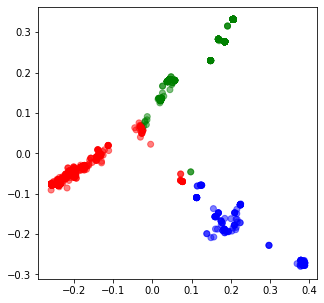

In [40]:
kmeans = KMeans(n_clusters=3, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

## Sequence Classification using Deep Learning in TensorFlow

The protein data set used above is also labeled. The labels represent the protein functions. Similarly, there are other labeled sequence data sets. For example, DARPA shared an intrusion weblog data set. It contains weblog sequences with positive labels if the log represents a network intrusion.

In such problems supervised learning is employed. Classification is a supervised learning we will demonstrate here.

### Protein Sequence Classification

The data set is taken from https://www.uniprot.org . The protein sequences in the data set have one of the two functions,
- Binds to DNA and alters its conformation. May be involved in regulation of gene expression, nucleoid organization and DNA protection.
- Might take part in the signal recognition particle (SRP) pathway. This is inferred from the conservation of its genetic proximity to ftsY/ffh. May be a regulatory protein.

There are a total of 2113 samples. The sequence lengths vary between 80-130.

In [ ]:
# Loading data
data = pd.read_csv('data/protein_classification.csv')


# Data preprocessing
y = data['Function [CC]']
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

corpus = data.loc[:,['Entry','Sequence']]
corpus.columns = ['id', 'sequence']
corpus['sequence'] = corpus['sequence'].map(list)

#### Sequence embeddings

In [42]:
# Sequence embedding
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
X = sgtembedding_df.set_index('id')

INFO: Pandarallel will run on 7 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


We will perform a 10-fold cross-validation to measure the performance of the classification model.

In [43]:
kfold = 10
X = X
y = encoded_y

random_state = 1

test_F1 = np.zeros(kfold)
skf = KFold(n_splits = kfold, shuffle = True, random_state = random_state)
k = 0
epochs = 50
batch_size = 128

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = Sequential()
    model.add(Dense(64, input_shape = (X_train.shape[1],))) 
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.fit(X_train, y_train ,batch_size=batch_size, epochs=epochs, verbose=0)
    
    y_pred = model.predict_proba(X_test).round().astype(int)
    y_train_pred = model.predict_proba(X_train).round().astype(int)

    test_F1[k] = sklearn.metrics.f1_score(y_test, y_pred)
    k+=1
    
print ('Average f1 score', np.mean(test_F1))

Average f1 score 1.0


### Weblog Classification for Intrusion Detection

This data sample is taken from https://www.ll.mit.edu/r-d/datasets/1998-darpa-intrusion-detection-evaluation-dataset. 
This is a network intrusion data containing audit logs and any attack as a positive label. Since, network intrusion is a rare event, the data is unbalanced. Here we will,
- build a sequence classification model to predict a network intrusion.

Each sequence contains in the data is a series of activity, for example, {login, password}. The _alphabets_ in the input data sequences are already encoded into integers. The original sequences data file is also present in the `/data` directory.

In [46]:
# Loading data
data = pd.read_csv('data/darpa_data.csv')
data.columns

Index(['timeduration', 'seqlen', 'seq', 'class'], dtype='object')

In [47]:
data['id'] = data.index

In [ ]:
# Data preprocessing
y = data['class']
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

corpus = data.loc[:,['id','seq']]
corpus.columns = ['id', 'sequence']
corpus['sequence'] = corpus['sequence'].map(list)

#### Sequence embeddings
In this data, the sequence embeddings should be **length-sensitive**. 

The lengths are important here because sequences with similar patterns but different lengths can have different labels. Consider a simple example of two sessions: `{login, pswd, login, pswd,...}` and `{login, pswd,...(repeated several times)..., login, pswd}`. 

While the first session can be a regular user mistyping the password once, the other session is possibly an attack to guess the password. Thus, the sequence lengths are as important as the patterns.

Therefore, `lengthsensitive=True` is used here.

In [50]:
# Sequence embedding
sgt_ = SGT(kappa=5, 
           lengthsensitive=True, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')
sgtembedding_df

INFO: Pandarallel will run on 7 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(0, 5)","(0, 6)","(0, 7)","(0, 8)","(0, 9)",...,"(~, 1)","(~, 2)","(~, 3)","(~, 4)","(~, 5)","(~, 6)","(~, 7)","(~, 8)","(~, 9)","(~, ~)"
id,,,,,,,,,,,,,,,,,,,,,
0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.485034,0.486999,0.485802,0.483097,0.483956,0.000000,0.000000,0.000000,0.000000,0.178609
1.0,0.000000,0.025622,0.228156,0.000000e+00,0.000000e+00,1.310714e-09,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.447620,0.452097,0.464568,0.367296,0.525141,0.455018,0.374364,0.414081,0.549981,0.172479
2.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.525605,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.193359,0.071469
3.0,0.077999,0.208974,0.230338,1.830519e-01,1.200926e-17,1.696880e-01,0.093646,7.985870e-02,2.896813e-05,3.701710e-05,...,0.474072,0.468353,0.463594,0.177507,0.551270,0.418652,0.309652,0.384657,0.378225,0.170362
4.0,0.000000,0.023695,0.217819,2.188276e-33,0.000000e+00,6.075992e-11,0.000000,0.000000e+00,5.681668e-39,0.000000e+00,...,0.464120,0.468229,0.452170,0.000000,0.501242,0.000000,0.300534,0.161961,0.000000,0.167082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106.0,0.000000,0.024495,0.219929,2.035190e-17,1.073271e-18,5.656994e-11,0.000000,0.000000e+00,5.047380e-29,0.000000e+00,...,0.502213,0.544343,0.477281,0.175901,0.461103,0.000000,0.000000,0.162796,0.000000,0.167687
107.0,0.110422,0.227478,0.217549,1.723963e-01,1.033292e-14,3.896725e-07,0.083685,2.940589e-08,8.864072e-02,4.813990e-29,...,0.490398,0.522016,0.466808,0.470603,0.479795,0.480057,0.194888,0.172397,0.164873,0.172271
108.0,0.005646,0.202424,0.196786,2.281242e-01,1.133936e-01,1.862098e-01,0.000000,1.212869e-01,9.180520e-08,0.000000e+00,...,0.432834,0.434953,0.439615,0.390864,0.481764,0.600875,0.166766,0.165368,0.000000,0.171729


#### Applying PCA on the embeddings
The embeddings are sparse and high-dimensional. PCA is, therefore, applied for dimension reduction.

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=35)
pca.fit(sgtembedding_df)
X = pca.transform(sgtembedding_df)
print(np.sum(pca.explained_variance_ratio_))

0.9962446146783123


#### Building a Multi-Layer Perceptron Classifier
The PCA transforms of the embeddings are used directly as inputs to an MLP classifier.

In [52]:
kfold = 3
random_state = 11

X = X
y = encoded_y

test_F1 = np.zeros(kfold)
time_k = np.zeros(kfold)
skf = StratifiedKFold(n_splits=kfold, shuffle=True, random_state=random_state)
k = 0
epochs = 300
batch_size = 15

# class_weight = {0 : 1., 1: 1.,}  # The weights can be changed and made inversely proportional to the class size to improve the accuracy.
class_weight = {0 : 0.12, 1: 0.88,}

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = Sequential()
    model.add(Dense(128, input_shape=(X_train.shape[1],))) 
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    start_time = time.time()
    model.fit(X_train, y_train ,batch_size=batch_size, epochs=epochs, verbose=1, class_weight=class_weight)
    end_time = time.time()
    time_k[k] = end_time-start_time

    y_pred = model.predict_proba(X_test).round().astype(int)
    y_train_pred = model.predict_proba(X_train).round().astype(int)
    test_F1[k] = sklearn.metrics.f1_score(y_test, y_pred)
    k += 1

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               4608      
_________________________________________________________________
activation_30 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 129       
_________________________________________________________________
activation_31 (Activation)   (None, 1)                 0         
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________
  ...
    to  
  ['...']
Train on 74 samples
Epoch 1/300
74/74 [==============================] - 0s 7ms/sample - los

74/74 [==============================] - 0s 140us/sample - loss: 0.0317 - accuracy: 0.8784
Epoch 148/300
74/74 [==============================] - 0s 138us/sample - loss: 0.0343 - accuracy: 0.8649
Epoch 149/300
74/74 [==============================] - 0s 140us/sample - loss: 0.0343 - accuracy: 0.8649
Epoch 150/300
74/74 [==============================] - 0s 140us/sample - loss: 0.0335 - accuracy: 0.8649
Epoch 151/300
74/74 [==============================] - 0s 159us/sample - loss: 0.0344 - accuracy: 0.8649
Epoch 152/300
74/74 [==============================] - 0s 141us/sample - loss: 0.0331 - accuracy: 0.8919
Epoch 153/300
74/74 [==============================] - 0s 172us/sample - loss: 0.0317 - accuracy: 0.8649
Epoch 154/300
74/74 [==============================] - 0s 169us/sample - loss: 0.0321 - accuracy: 0.8784
Epoch 155/300
74/74 [==============================] - 0s 153us/sample - loss: 0.0305 - accuracy: 0.8649
Epoch 156/300
74/74 [==============================] - 0s 135us/sampl

  ...
    to  
  ['...']
Train on 74 samples
Epoch 1/300
74/74 [==============================] - 0s 7ms/sample - loss: 0.1450 - accuracy: 0.5270
Epoch 2/300
74/74 [==============================] - 0s 138us/sample - loss: 0.1398 - accuracy: 0.6216
Epoch 3/300
74/74 [==============================] - 0s 128us/sample - loss: 0.1370 - accuracy: 0.7162
Epoch 4/300
74/74 [==============================] - 0s 149us/sample - loss: 0.1344 - accuracy: 0.6757
Epoch 5/300
74/74 [==============================] - 0s 136us/sample - loss: 0.1283 - accuracy: 0.7297
Epoch 6/300
74/74 [==============================] - 0s 133us/sample - loss: 0.1210 - accuracy: 0.8108
Epoch 7/300
74/74 [==============================] - 0s 131us/sample - loss: 0.1156 - accuracy: 0.8108
Epoch 8/300
74/74 [==============================] - 0s 136us/sample - loss: 0.1159 - accuracy: 0.8108
Epoch 9/300
74/74 [==============================] - 0s 119us/sample - loss: 0.1104 - accuracy: 0.8514
Epoch 10/300
74/74 [==========

74/74 [==============================] - 0s 131us/sample - loss: 0.0280 - accuracy: 0.9189
Epoch 157/300
74/74 [==============================] - 0s 127us/sample - loss: 0.0281 - accuracy: 0.9189
Epoch 158/300
74/74 [==============================] - 0s 133us/sample - loss: 0.0273 - accuracy: 0.9189
Epoch 159/300
74/74 [==============================] - 0s 122us/sample - loss: 0.0271 - accuracy: 0.9189
Epoch 160/300
74/74 [==============================] - 0s 137us/sample - loss: 0.0249 - accuracy: 0.9189
Epoch 161/300
74/74 [==============================] - 0s 124us/sample - loss: 0.0293 - accuracy: 0.9189
Epoch 162/300
74/74 [==============================] - 0s 127us/sample - loss: 0.0280 - accuracy: 0.9189
Epoch 163/300
74/74 [==============================] - 0s 122us/sample - loss: 0.0286 - accuracy: 0.9189
Epoch 164/300
74/74 [==============================] - 0s 121us/sample - loss: 0.0292 - accuracy: 0.9189
Epoch 165/300
74/74 [==============================] - 0s 138us/sampl

74/74 [==============================] - 1s 14ms/sample - loss: 0.1403 - accuracy: 0.2703
Epoch 2/300
74/74 [==============================] - 0s 130us/sample - loss: 0.1384 - accuracy: 0.3378
Epoch 3/300
74/74 [==============================] - 0s 120us/sample - loss: 0.1339 - accuracy: 0.3378
Epoch 4/300
74/74 [==============================] - 0s 129us/sample - loss: 0.1323 - accuracy: 0.4730
Epoch 5/300
74/74 [==============================] - 0s 133us/sample - loss: 0.1256 - accuracy: 0.5405
Epoch 6/300
74/74 [==============================] - 0s 130us/sample - loss: 0.1223 - accuracy: 0.6216
Epoch 7/300
74/74 [==============================] - 0s 121us/sample - loss: 0.1219 - accuracy: 0.6216
Epoch 8/300
74/74 [==============================] - 0s 126us/sample - loss: 0.1219 - accuracy: 0.6351
Epoch 9/300
74/74 [==============================] - 0s 137us/sample - loss: 0.1109 - accuracy: 0.7027
Epoch 10/300
74/74 [==============================] - 0s 116us/sample - loss: 0.1088 -

Epoch 80/300
74/74 [==============================] - 0s 136us/sample - loss: 0.0389 - accuracy: 0.8649
Epoch 81/300
74/74 [==============================] - 0s 117us/sample - loss: 0.0373 - accuracy: 0.8649
Epoch 82/300
74/74 [==============================] - 0s 124us/sample - loss: 0.0366 - accuracy: 0.8649
Epoch 83/300
74/74 [==============================] - 0s 139us/sample - loss: 0.0340 - accuracy: 0.8649
Epoch 84/300
74/74 [==============================] - 0s 132us/sample - loss: 0.0358 - accuracy: 0.8784
Epoch 85/300
74/74 [==============================] - 0s 126us/sample - loss: 0.0341 - accuracy: 0.8649
Epoch 86/300
74/74 [==============================] - 0s 126us/sample - loss: 0.0371 - accuracy: 0.8784
Epoch 87/300
74/74 [==============================] - 0s 145us/sample - loss: 0.0335 - accuracy: 0.8784
Epoch 88/300
74/74 [==============================] - 0s 135us/sample - loss: 0.0351 - accuracy: 0.8649
Epoch 89/300
74/74 [==============================] - 0s 123us/s

74/74 [==============================] - 0s 127us/sample - loss: 0.0347 - accuracy: 0.8514
Epoch 237/300
74/74 [==============================] - 0s 123us/sample - loss: 0.0325 - accuracy: 0.8649
Epoch 238/300
74/74 [==============================] - 0s 140us/sample - loss: 0.0348 - accuracy: 0.8649
Epoch 239/300
74/74 [==============================] - 0s 122us/sample - loss: 0.0321 - accuracy: 0.8649
Epoch 240/300
74/74 [==============================] - 0s 125us/sample - loss: 0.0310 - accuracy: 0.8784
Epoch 241/300
74/74 [==============================] - 0s 138us/sample - loss: 0.0336 - accuracy: 0.8649
Epoch 242/300
74/74 [==============================] - 0s 119us/sample - loss: 0.0290 - accuracy: 0.8649
Epoch 243/300
74/74 [==============================] - 0s 133us/sample - loss: 0.0296 - accuracy: 0.8649
Epoch 244/300
74/74 [==============================] - 0s 119us/sample - loss: 0.0322 - accuracy: 0.8514
Epoch 245/300
74/74 [==============================] - 0s 127us/sampl

In [53]:
print ('Average f1 score', np.mean(test_F1))
print ('Average Run time', np.mean(time_k))

Average f1 score 0.6341880341880342
Average Run time 3.880180994669596


#### Building an LSTM Classifier on the sequences for comparison
We built an LSTM Classifier on the sequences to compare the accuracy.

In [54]:
X = data['seq']
encoded_X = np.ndarray(shape=(len(X),), dtype=list)
for i in range(0,len(X)):
    encoded_X[i]=X.iloc[i].split("~")
X

0      1~2~3~3~3~3~3~3~1~4~5~1~2~3~3~3~3~3~3~1~4~5~1~...
1      6~5~5~6~5~6~5~2~5~5~5~5~5~5~5~5~5~5~5~5~5~5~5~...
2      19~19~19~19~19~19~19~19~19~19~19~19~19~19~19~1...
3      6~5~5~6~5~6~5~2~5~5~5~5~5~5~5~5~5~5~5~5~5~5~5~...
4      5~5~17~5~5~5~5~5~10~2~11~2~11~11~12~11~11~5~2~...
                             ...                        
106    10~2~11~2~11~11~12~11~11~5~2~11~5~2~5~2~3~14~3...
107    5~5~2~5~17~6~5~6~5~5~2~6~17~3~2~2~3~5~2~3~5~6~...
108    6~5~6~5~5~6~5~5~6~6~6~6~6~6~6~6~6~6~6~6~6~6~6~...
109    6~5~5~6~5~6~5~2~38~2~3~5~22~39~5~5~5~5~5~5~5~5...
110    5~6~5~5~10~2~11~2~11~11~12~11~5~2~11~11~12~11~...
Name: seq, Length: 111, dtype: object

In [56]:
max_seq_length = np.max(data['seqlen'])
encoded_X = tf.keras.preprocessing.sequence.pad_sequences(encoded_X, maxlen=max_seq_length)

In [57]:
kfold = 3
random_state = 11

test_F1 = np.zeros(kfold)
time_k = np.zeros(kfold)

epochs = 50
batch_size = 15
skf = StratifiedKFold(n_splits=kfold, shuffle=True, random_state=random_state)
k = 0

for train_index, test_index in skf.split(encoded_X, y):
    X_train, X_test = encoded_X[train_index], encoded_X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    embedding_vecor_length = 32
    top_words=50
    model = Sequential()
    model.add(Embedding(top_words, embedding_vecor_length, input_length=max_seq_length))
    model.add(LSTM(32))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.summary()
    
    start_time = time.time()
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    end_time=time.time()
    time_k[k]=end_time-start_time

    y_pred = model.predict_proba(X_test).round().astype(int)
    y_train_pred=model.predict_proba(X_train).round().astype(int)
    test_F1[k]=sklearn.metrics.f1_score(y_test, y_pred)
    k+=1

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1773, 32)          1600      
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 33        
_________________________________________________________________
activation_36 (Activation)   (None, 1)                 0         
Total params: 9,953
Trainable params: 9,953
Non-trainable params: 0
_________________________________________________________________
Train on 74 samples
Epoch 1/50
74/74 [==============================] - 5s 72ms/sample - loss: 0.6894 - accuracy: 0.5676
Epoch 2/50
74/74 [==============================] - 4s 48ms/sample - loss: 0.6590 - accuracy: 0.8784
Epoch 3/50
74/74 [=========

74/74 [==============================] - 4s 56ms/sample - loss: 0.2374 - accuracy: 0.9054
Epoch 35/50
74/74 [==============================] - 4s 55ms/sample - loss: 0.2372 - accuracy: 0.9189
Epoch 36/50
74/74 [==============================] - 4s 56ms/sample - loss: 0.2120 - accuracy: 0.9054
Epoch 37/50
74/74 [==============================] - 4s 60ms/sample - loss: 0.2243 - accuracy: 0.8919
Epoch 38/50
74/74 [==============================] - 4s 56ms/sample - loss: 0.2125 - accuracy: 0.8919
Epoch 39/50
74/74 [==============================] - 4s 55ms/sample - loss: 0.2108 - accuracy: 0.9054
Epoch 40/50
74/74 [==============================] - 4s 56ms/sample - loss: 0.2002 - accuracy: 0.9189
Epoch 41/50
74/74 [==============================] - 4s 56ms/sample - loss: 0.2103 - accuracy: 0.9459
Epoch 42/50
74/74 [==============================] - 4s 52ms/sample - loss: 0.1961 - accuracy: 0.9459
Epoch 43/50
74/74 [==============================] - 4s 57ms/sample - loss: 0.1837 - accuracy:

In [58]:
print ('Average f1 score', np.mean(test_F1))
print ('Average Run time', np.mean(time_k))

Average f1 score 0.36111111111111116
Average Run time 192.46954011917114


We find that the LSTM classifier gives a significantly lower F1 score. This may be improved by changing the model. However, we find that the SGT embedding could work with a small and unbalanced data without the need of a complicated classifier model.

LSTM models typically require more data for training and also has significantly more computation time. The LSTM model above took 425.6 secs while the MLP model took just 9.1 secs.

## Sequence Search

Sequence data sets are generally large. For example, sequences of listening history in music streaming services, such as Pandora, for more than 70M users are huge. In protein data bases there could be even larger size. For instance, the Uniprot data repository has more than 177M sequences.

Searching for similar sequences in such large data bases is challenging. SGT embedding provides a simple solution. In the following it will be shown on a protein data set that SGT embedding can be used to compute similarity between a query sequence and the sequence corpus using a dot product. The sequences with the highest dot product are returned as the most similar sequence to the query.

### Protein Sequence Search

In the following, a sample of 10k protein sequences are used for illustration. The data is taken from https://www.uniprot.org .

In [4]:
# Loading data
data = pd.read_csv('data/protein-uniprot-reviewed-Ano-10k.tab', sep='\t')

# Data preprocessing
corpus = data.loc[:,['Entry','Sequence']]
corpus.columns = ['id', 'sequence']
corpus['sequence'] = corpus['sequence'].map(list)
corpus.head(3)

,id,sequence
0,I2WKR6,"[M, V, H, K, S, D, S, D, E, L, A, A, L, R, A, ..."
1,A0A2A6M8K9,"[M, Q, E, S, L, V, V, R, R, E, T, H, I, A, A, ..."
2,A0A3G5KEC3,"[M, A, S, G, A, Y, S, K, Y, L, F, Q, I, I, G, ..."


In [5]:
# Protein sequence alphabets
alphabets = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 
             'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 
             'W', 'X', 'Y', 'U', 'O']  # List of amino acids

# Alphabets are known and inputted 
# as arguments for faster computation
sgt_ = SGT(alphabets=alphabets, 
           lengthsensitive=True, 
           kappa=1, 
           flatten=True, 
           mode='multiprocessing')

sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')

INFO: Pandarallel will run on 7 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [10]:
'''
Search proteins similar to a query protein.
The approach is to find the SGT embedding of the
query protein and find its similarity with the
embeddings of the protein database.
'''

query_protein = 'MSHVFPIVIDDNFLSPQDLVSAARSGCSLRLHTGVVDKIDRAHRFVLEIAGAEALHYGINTGFGSLCTTHIDPADLSTLQHNLLKSHACGVGPTVSEEVSRVVTLIKLLTFRTGNSGVSLSTVNRIIDLWNHGVVGAIAQKGTVGASGDLAPLAHLFLPLIGLGQVWHRGVLRPSREVMDELKLAPLTLQPKDGLCLTNGVQYLNAWGALSTVRAKRLVALADLCAAMSMMGFSAARSFIEAQIHQTSLHPERGHVALHLRTLTHGSNHADLPHCNPAMEDPYSFRCAPQVHGAARQVVGYLETVIGNECNSVSDNPLVFPDTRQILTCGNLHGQSTAFALDFAAIGITDLSNISERRTYQLLSGQNGLPGFLVAKPGLNSGFMVVQYTSAALLNENKVLSNPASVDTIPTCHLQEDHVSMGGTSAYKLQTILDNCETILAIELMTACQAIDMNPGLQLSERGRAIYEAVREEIPFVKEDHLMAGLISKSRDLCQHSTVIAQQLAEMQAQ'

# Step 1. Compute sgt embedding for the query protein.
query_protein_sgt_embedding = sgt_.fit(list(query_protein))

# Step 2. Compute the dot product of query embedding 
# with the protein embedding database.
similarity = sgtembedding_df.dot(query_protein_sgt_embedding)

# Step 3. Return the top k protein names based on similarity.
similarity.sort_values(ascending=False)

id
K0ZGN5        2773.749663
A0A0Y1CPH7    1617.451379
A0A5R8LCJ1    1566.833152
A0A290WY40    1448.772820
A0A073K6N6    1392.267250
                 ...     
A0A1S7UBK4     160.074989
A0A2S7T1R9     156.580584
A0A0E0UQV6     155.834932
A0A1Y5Y0S0     148.862049
B0NRP3         117.656497
Length: 10063, dtype: float64

## SGT - Spark implementation for faster embedding

As mentioned in the previous section, sequence data sets can be large. SGT complexity is linear with the number of sequences in a data set. Still if the data size is large the computation becomes high. For example, for a set of 1M protein sequences the default SGT mode takes over 24 hours.

Using distributed computing with Spark the runtime can be significantly reduced. For instance, SGT-Spark on the same 1M protein data set took less than 29 minutes.

In the following, Spark implementation for SGT is shown. First, it is applied on a smaller 10k data set for comparison. Then it is applied on 1M data set without any syntactical change.

In [ ]:
'''
Load the data and remove header.
'''
data = sc.textFile('data/protein-uniprot-reviewed-Ano-10k.tab')
 
header = data.first() #extract header
data = data.filter(lambda row: row != header)   #filter out header
data.take(1)  # See one sample

# ['I2WKR6\tI2WKR6_ECOLX\tunreviewed\tType III restriction enzyme, res subunit (EC 3.1.21.5)\tEC90111_4246\tEscherichia coli 9.0111\t786\tMVHKSDSDELAALRAENVRLVSLLEAHGIEWRRKPQSPVPRVSVLSTNEKVALFRRLFRGRDDVWALRWESKTSGKSGYSPACANEWQLGICGKPRIKCGDCAHRQLIPVSDLVIYHHLAGTHTAGMYPLLEDDSCYFLAVDFDEAEWQKDASAFMRSCDELGVPAALEISRSRQGAHVWIFFASRVSAREARRLGTAIISYTCSRTRQLRLGSYDRLFPNQDTMPKGGFGNLIALPLQKRPRELGGSVFVDMNLQPYPDQWAFLVSVIPMNVQDIEPTILRATGSIHPLDVNFINEEDLGTPWEEKKSSGNRLNIAVTEPLIITLANQIYFEKAQLPQALVNRLIRLAAFPNPEFYKAQAMRMSVWNKPRVIGCAENYPQHIALPRGCLDSALSFLRYNNIAAELIDKRFAGTECNAVFTGNLRAEQEEAVSALLRYDTGVLCAPTAFGKTVTAAAVIARRKVNTLILVHRTELLKQWQERLAVFLQVGDSIGIIGGGKHKPCGNIDIAVVQSISRHGEVEPLVRNYGQIIVDECHHIGAVSFSAILKETNARYLLGLTATPIRRDGLHPIIFMYCGAIRHTAARPKESLHNLEVLTRSRFTSGHLPSDARIQDIFREIALDHDRTVAIAEEAMKAFGQGRKVLVLTERTDHLDDIASVMNTLKLSPFVLHSRLSKKKRTMLISGLNALPPDSPRILLSTGRLIGEGFDHPPLDTLILAMPVSWKGTLQQYAGRLHREHTGKSDVRIIDFVDTAYPVLLRMWDKRQRGYKAMGYRIVADGEGLSF']

In [ ]:
# Repartition for increasing the parallel processes
data = data.repartition(500)

In [ ]:
def preprocessing(line):
    '''
    Original data are lines where each line has \t
    separated values. We are interested in preserving
    the first value (entry id), tmp[0], and the last value
    (the sequence), tmp[-1].
    '''
    tmp = line.split('\t')
    id = tmp[0]
    sequence = list(tmp[-1])
    return (id, sequence)

processeddata = data.map(lambda line: preprocessing(line))
processeddata.take(1)  # See one sample

# [('A0A2E9WIJ1',
#   ['M','Y','I','F','L','T','L','A','L','F','S',...,'F','S','I','F','A','K','L','D','K','N','D'])]

In [ ]:
# Protein sequence alphabets
alphabets = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 
             'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 
             'W', 'X', 'Y', 'U', 'O']  # List of amino acids

In [ ]:
'''
Spark approach.
In this approach the alphabets argument has to
be passed to the SGT class definition.
The SGT.fit() is then called in parallel.
'''
sgt_ = sgt.SGT(alphabets=alphabets, 
               kappa=1, 
               lengthsensitive=True, 
               flatten=True)
rdd = processeddata.map(lambda x: (x[0], list(sgt_.fit(x[1]))))
sgtembeddings = rdd.collect()
# Command took 29.66 seconds -- by cranjan@processminer.com at 4/22/2020, 12:31:23 PM on databricks

### Compare with the default SGT mode

In [ ]:
# Loading data
data = pd.read_csv('data/protein-uniprot-reviewed-Ano-10k.tab', sep='\t')

# Data preprocessing
corpus = data.loc[:,['Entry','Sequence']]
corpus.columns = ['id', 'sequence']
corpus['sequence'] = corpus['sequence'].map(list)
corpus.head(3)

In [ ]:
sgt_ = sgt.SGT(alphabets=alphabets, 
               lengthsensitive=True, 
               kappa=1, 
               flatten=True, 
               mode='default')

sgtembedding_df = sgt_.fit_transform(corpus)
# Command took 13.08 minutes -- by cranjan@processminer.com at 4/22/2020, 1:48:02 PM on databricks

### 1M Protein Database

In [ ]:
'''
Load the data and remove header.
'''
data = sc.textFile('data/protein-uniprot-reviewed-Ano-1M.tab')
 
header = data.first() #extract header
data = data.filter(lambda row: row != header)   #filter out header
data.take(1)  # See one sample

# ['I2WKR6\tI2WKR6_ECOLX\tunreviewed\tType III restriction enzyme, res subunit (EC 3.1.21.5)\tEC90111_4246\tEscherichia coli 9.0111\t786\tMVHKSDSDELAALRAENVRLVSLLEAHGIEWRRKPQSPVPRVSVLSTNEKVALFRRLFRGRDDVWALRWESKTSGKSGYSPACANEWQLGICGKPRIKCGDCAHRQLIPVSDLVIYHHLAGTHTAGMYPLLEDDSCYFLAVDFDEAEWQKDASAFMRSCDELGVPAALEISRSRQGAHVWIFFASRVSAREARRLGTAIISYTCSRTRQLRLGSYDRLFPNQDTMPKGGFGNLIALPLQKRPRELGGSVFVDMNLQPYPDQWAFLVSVIPMNVQDIEPTILRATGSIHPLDVNFINEEDLGTPWEEKKSSGNRLNIAVTEPLIITLANQIYFEKAQLPQALVNRLIRLAAFPNPEFYKAQAMRMSVWNKPRVIGCAENYPQHIALPRGCLDSALSFLRYNNIAAELIDKRFAGTECNAVFTGNLRAEQEEAVSALLRYDTGVLCAPTAFGKTVTAAAVIARRKVNTLILVHRTELLKQWQERLAVFLQVGDSIGIIGGGKHKPCGNIDIAVVQSISRHGEVEPLVRNYGQIIVDECHHIGAVSFSAILKETNARYLLGLTATPIRRDGLHPIIFMYCGAIRHTAARPKESLHNLEVLTRSRFTSGHLPSDARIQDIFREIALDHDRTVAIAEEAMKAFGQGRKVLVLTERTDHLDDIASVMNTLKLSPFVLHSRLSKKKRTMLISGLNALPPDSPRILLSTGRLIGEGFDHPPLDTLILAMPVSWKGTLQQYAGRLHREHTGKSDVRIIDFVDTAYPVLLRMWDKRQRGYKAMGYRIVADGEGLSF']

In [ ]:
# Repartition for increasing the parallel processes
data = data.repartition(10000)

In [ ]:
processeddata = data.map(lambda line: preprocessing(line))
processeddata.take(1)  # See one sample

# [('A0A2E9WIJ1',
#   ['M','Y','I','F','L','T','L','A','L','F','S',...,'F','S','I','F','A','K','L','D','K','N','D'])]

In [ ]:
# Protein sequence alphabets
alphabets = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 
             'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 
             'W', 'X', 'Y', 'U', 'O']  # List of amino acids

In [ ]:
'''
Spark approach.
In this approach the alphabets argument has to
be passed to the SGT class definition.
The SGT.fit() is then called in parallel.
'''
sgt_ = sgt.SGT(alphabets=alphabets, 
               kappa=1, 
               lengthsensitive=True, 
               flatten=True)
rdd = processeddata.map(lambda x: (x[0], list(sgt_.fit(x[1]))))
sgtembeddings = rdd.collect()
# Command took 28.98 minutes -- by cranjan@processminer.com at 4/22/2020, 3:16:41 PM on databricks

In [3]:
'''OPTIONAL.
Save the embeddings for future use or 
production deployment.'''
# Save for deployment
# pickle.dump(sgtembeddings, 
#             open("data/protein-sgt-embeddings-1M.pkl", "wb"))
# The pickle dump is shared at https://mega.nz/file/hiAxAAoI#SStAIn_FZjAHvXSpXfdy8VpISG6rusHRf9HlUSqwcsw
# sgtembeddings = pickle.load(open("data/protein-sgt-embeddings-1M.pkl", "rb"))

### Sequence Search using SGT - Spark

Since `sgtembeddings` on the 1M data set is large it is recommended to use distributed computing to find similar proteins during a search.

In [ ]:
sgtembeddings_rdd = sc.parallelize(list(dict(sgtembeddings).items()))
sgtembeddings_rdd = sgtembeddings_rdd.repartition(10000)

In [ ]:
'''
Search proteins similar to a query protein.
The approach is to find the SGT embedding of the
query protein and find its similarity with the
embeddings of the protein database.
'''

query_protein = 'MSHVFPIVIDDNFLSPQDLVSAARSGCSLRLHTGVVDKIDRAHRFVLEIAGAEALHYGINTGFGSLCTTHIDPADLSTLQHNLLKSHACGVGPTVSEEVSRVVTLIKLLTFRTGNSGVSLSTVNRIIDLWNHGVVGAIAQKGTVGASGDLAPLAHLFLPLIGLGQVWHRGVLRPSREVMDELKLAPLTLQPKDGLCLTNGVQYLNAWGALSTVRAKRLVALADLCAAMSMMGFSAARSFIEAQIHQTSLHPERGHVALHLRTLTHGSNHADLPHCNPAMEDPYSFRCAPQVHGAARQVVGYLETVIGNECNSVSDNPLVFPDTRQILTCGNLHGQSTAFALDFAAIGITDLSNISERRTYQLLSGQNGLPGFLVAKPGLNSGFMVVQYTSAALLNENKVLSNPASVDTIPTCHLQEDHVSMGGTSAYKLQTILDNCETILAIELMTACQAIDMNPGLQLSERGRAIYEAVREEIPFVKEDHLMAGLISKSRDLCQHSTVIAQQLAEMQAQ'

# Step 1. Compute sgt embedding for the query protein.
query_protein_sgt_embedding = sgt_.fit(list(query_protein))

# Step 2. Broadcast the embedding to the cluster.
query_protein_sgt_embedding_broadcasted = sc.broadcast(list(query_protein_sgt_embedding))

# Step 3. Compute similarity between each sequence embedding and the query.
similarity = sgtembeddings_rdd.map(lambda x: (x[0], 
                                              np.dot(query_protein_sgt_embedding_broadcasted.value, 
                                                     x[1]))).collect()

# Step 4. Show the most similar sequences with the query.
pd.DataFrame(similarity).sort_values(by=1, ascending=False)

## Datasets

Data sets provided with this release are,

### Simulated Sequence Dataset

A benchmark simulated sequence data set with labels are provided. There are 5 labels and a total of 300 samples. The sequence lengths range from 50-800.

Location:

`data/simulated-sequence-dataset.csv`

### Protein Dataset - 2k

Protein sequences data set taken from https://www.uniprot.org. The data set has reviewed and annotated proteins. The fields in the data set are,

- Entry
- Entry name	
- Status	
- Protein names	
- Gene names	
- Organism	
- Length	
- Sequence	
- Function [CC]	
- Features	
- Taxonomic lineage (all)
- Protein families

There are a total of 2113 samples (protein sequences). The proteins have one of the following two functions,

- Binds to DNA and alters its conformation. May be involved in regulation of gene expression, nucleoid organization and DNA protection.
- Might take part in the signal recognition particle (SRP) pathway. This is inferred from the conservation of its genetic proximity to ftsY/ffh. May be a regulatory protein.


The data set has about 40:60 class distribution.

Location:
`data/protein_classification.csv`


### Darpa Weblog Network Intrusion Dataset

This is a processed weblog data provided by DARPA in: DARPA INTRUSION DETECTION EVALUATION DATASET. The link to it is shared by MIT at https://www.ll.mit.edu/r-d/datasets/1998-darpa-intrusion-detection-evaluation-dataset .

The available data set is a weblog dump with timestamps. They are converted to sequences and shared here. A sequence is labeled as 1 if it was a potential intrusion, otherwise 0. 

The data has 112 samples with imbalanced class distribution of about 10% positive labeled samples.

The available fields are,

- timeduration
- seqlen
- seq
- class

Location:

`data/darpa_data.csv`


### Protein Sequence - 10k, 1M and 3M

Three protein sequence data sets of size 10k, 1 Million, and 3 Million are provided. The 10k data set is available in GitHub, while the latter two are available publicly [here](https://mega.nz/folder/MqAzmKqS#2jqJKJifOgnFACP9GqX6QQ) https://mega.nz/folder/MqAzmKqS#2jqJKJifOgnFACP9GqX6QQ .

The fields in these data sets are,

- Entry	
- Entry name	
- Protein names	
- Gene names	
- Organism
- Length
- Sequence

The source of these data are https://www.uniprot.org .

Location:

10k: `data/protein-uniprot-reviewed-Ano-10k.tab`

1M: `https://mega.nz/folder/MqAzmKqS#2jqJKJifOgnFACP9GqX6QQ/file/t7YlUQTK`

3M: `https://mega.nz/folder/MqAzmKqS#2jqJKJifOgnFACP9GqX6QQ/file/InAzwYDa`
